In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display
import cv2

In [2]:
#ML
from skimage.io import imread,imshow
from skimage import measure,color,io,feature
from scipy import ndimage

In [3]:
#DL
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential,load_model
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K

C:\Users\BEAMCONAN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
% matplotlib inline

In [5]:
x=[]
y=[]
path='C:/Users/BEAMCONAN/project_finger/Dataset'
for fname in os.listdir(path):
    print(fname,end=' ')
    paths=path+'/'+str(fname)
    for iname in os.listdir(paths):
        #print(iname,end=' ')
        pathss=paths+'/'+str(iname)
        img=imread(pathss)
        
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate1=ndimage.rotate(img,90)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate2=ndimage.rotate(img,180)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate3=ndimage.rotate(img,270)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
#         fig,(ax0,ax1,ax2,ax3)=plt.subplots(1,4)
#         ax0.imshow(img)
#         ax1.imshow(img_rotate1)
#         ax2.imshow(img_rotate2)
#         ax3.imshow(img_rotate3)
x=np.array(x)
y=np.array(y)
print(x.shape)

0 1 2 3 4 5 6 7 8 9 (760, 100, 100)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=507)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(532, 100, 100)
(228, 100, 100)
(532,)


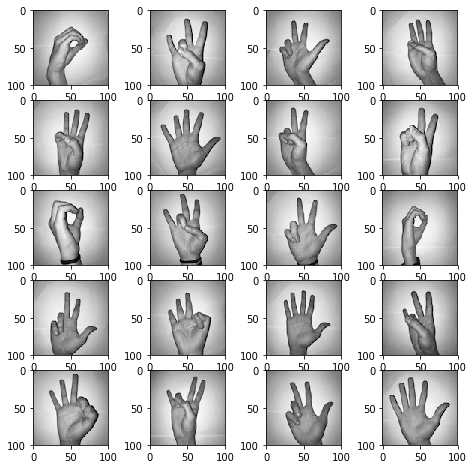

In [8]:
index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [9]:
num_classes = 10

x_train = x_train.reshape(532, 100, 100, 1)
x_test = x_test.reshape(228, 100, 100, 1)

# x_train /= 255  # normalize dataset
# x_test /= 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape)

532 train samples
228 test samples
(532, 10)


In [10]:
 model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.save_weights('weights.h5py')

epochs = 10 min_delta = 0.01 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 5s 12ms/step - loss: 2.2598 - acc: 0.1271 - val_loss: 2.2635 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2230 - acc: 0.1553 - val_loss: 2.3051 - val_acc: 0.1308
Epoch 3/10
425/425 [==============================] - 1s 3ms/step - loss: 2.1762 - acc: 0.1835 - val_loss: 2.1500 - val_acc: 0.3178
Epoch 4/10
425/425 [==============================] - 1s 3ms/step - loss: 1.6633 - acc: 0.4047 - val_loss: 1.5250 - val_acc: 0.3645
Epoch 5/10
425/425 [==============================] - 1s 3ms/step - loss: 1.2516 - acc: 0.5459 - val_loss: 1.2612 - val_acc: 0.5514
Epoch 6/10
425/425 [==============================] - 1s 3ms/step - loss: 0.8121 - acc: 0.7224 - val_loss: 0.6850 - val_acc: 0.7570
Epoch 7/10
425/425 [==============================] - 1s 3ms/step - loss: 0.4437 - acc: 0.8471 - val_loss: 0.3398 - val

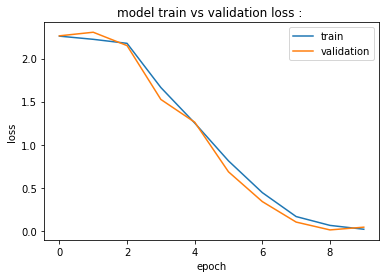

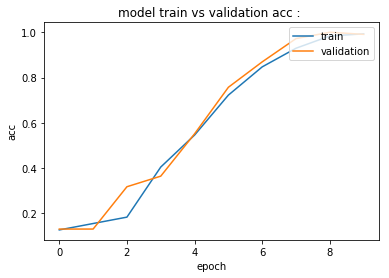

228/228 [==============================] - 0s 2ms/step
Acc = 0.9912280701754386
Loss = 0.03870510862192564


In [11]:
# model 1
print("epochs = 10 min_delta = 0.01 patience = 2")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.01,patience=2,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model1.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 10 min_delta = 0.01 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2670 - acc: 0.1412 - val_loss: 2.2775 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2289 - acc: 0.1906 - val_loss: 2.2608 - val_acc: 0.0841
Epoch 3/10
425/425 [==============================] - 1s 3ms/step - loss: 1.8821 - acc: 0.3506 - val_loss: 1.6819 - val_acc: 0.3925
Epoch 4/10
425/425 [==============================] - 1s 3ms/step - loss: 1.2931 - acc: 0.5271 - val_loss: 1.0817 - val_acc: 0.6075
Epoch 5/10
425/425 [==============================] - 1s 3ms/step - loss: 0.7724 - acc: 0.7176 - val_loss: 0.7011 - val_acc: 0.7757
Epoch 6/10
425/425 [==============================] - 1s 3ms/step - loss: 0.3820 - acc: 0.8753 - val_loss: 0.5140 - val_acc: 0.8505
Epoch 7/10
425/425 [==============================] - 1s 3ms/step - loss: 0.2179 - acc: 0.9247 - val_loss: 0.1388 - val_

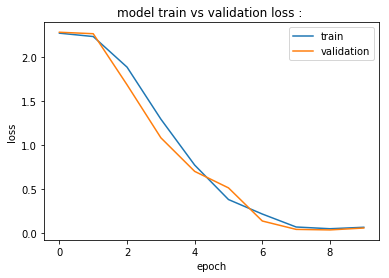

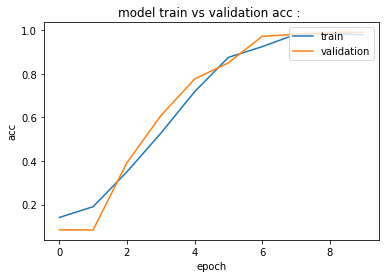

228/228 [==============================] - 0s 974us/step
Acc = 0.9956140350877193
Loss = 0.026911218014439534


In [12]:
# model 2
print("epochs = 10 min_delta = 0.01 patience = 3")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.01,patience=3,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model2.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 15 min_delta = 0.001 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2511 - acc: 0.1365 - val_loss: 2.2839 - val_acc: 0.0841
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1291 - acc: 0.2212 - val_loss: 1.8601 - val_acc: 0.3551
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 1.5710 - acc: 0.4188 - val_loss: 1.7869 - val_acc: 0.3551
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 1.3430 - acc: 0.4847 - val_loss: 1.3824 - val_acc: 0.4486
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 0.8171 - acc: 0.7106 - val_loss: 0.6999 - val_acc: 0.7664
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 0.3867 - acc: 0.8918 - val_loss: 0.2491 - val_acc: 0.9065
Epoch 7/15
425/425 [==============================] - 1s 3ms/step - loss: 0.2192 - acc: 0.9247 - val_loss: 0.1419 - val

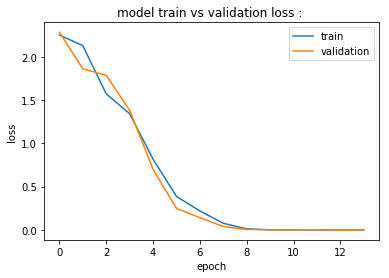

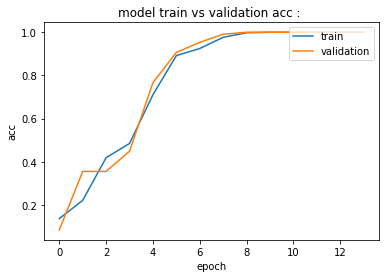

228/228 [==============================] - 0s 929us/step
Acc = 1.0
Loss = 0.0003058229391299711


In [14]:
# model 3
print("epochs = 15 min_delta = 0.001 patience = 4")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=4,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model3.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 15 min_delta = 0.01 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2626 - acc: 0.1224 - val_loss: 2.2800 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2115 - acc: 0.1647 - val_loss: 2.2237 - val_acc: 0.1589
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 1.7749 - acc: 0.3506 - val_loss: 1.4761 - val_acc: 0.4393
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 1.2814 - acc: 0.5129 - val_loss: 1.3613 - val_acc: 0.4393
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 0.9644 - acc: 0.6353 - val_loss: 1.0447 - val_acc: 0.6262
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 0.7450 - acc: 0.7671 - val_loss: 0.6513 - val_acc: 0.7570
Epoch 7/15
425/425 [==============================] - 1s 3ms/step - loss: 0.2904 - acc: 0.9035 - val_loss: 0.2512 - val_

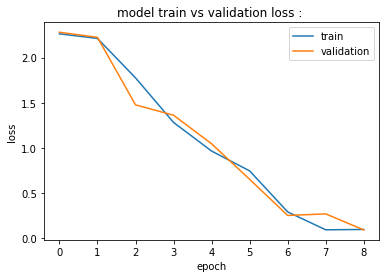

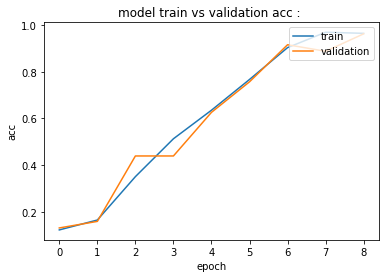

228/228 [==============================] - 0s 925us/step
Acc = 0.9824561403508771
Loss = 0.04450172023324851


In [15]:
# model 4
print("epochs = 15 min_delta = 0.01 patience = 0")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.01,patience=0,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model4.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 15 min_delta = 0.01 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2617 - acc: 0.1200 - val_loss: 2.2759 - val_acc: 0.1495
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2024 - acc: 0.1576 - val_loss: 2.3109 - val_acc: 0.1589
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 1.8288 - acc: 0.3482 - val_loss: 1.6560 - val_acc: 0.3738
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 1.2530 - acc: 0.5153 - val_loss: 1.2037 - val_acc: 0.5607
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 0.6817 - acc: 0.7624 - val_loss: 0.4650 - val_acc: 0.8598
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 0.3232 - acc: 0.9082 - val_loss: 0.3752 - val_acc: 0.8785
Epoch 7/15
425/425 [==============================] - 1s 3ms/step - loss: 0.1600 - acc: 0.9482 - val_loss: 0.1779 - val_

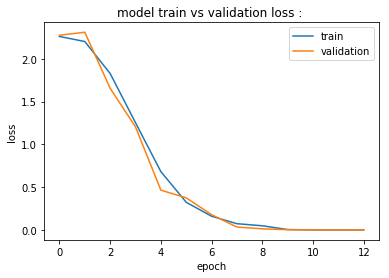

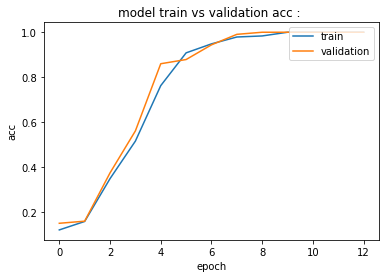

228/228 [==============================] - 0s 945us/step
Acc = 1.0
Loss = 0.0015983131304158618


In [16]:
# model 5
print("epochs = 15 min_delta = 0.01 patience = 3")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.01,patience=3,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model5.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 15 min_delta = 0.1 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2824 - acc: 0.1388 - val_loss: 2.2642 - val_acc: 0.0841
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2138 - acc: 0.1812 - val_loss: 2.2329 - val_acc: 0.1869
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 1.8341 - acc: 0.3506 - val_loss: 1.7178 - val_acc: 0.3178
Epoch 4/15
425/425 [==============================] - 1s 4ms/step - loss: 1.1802 - acc: 0.5529 - val_loss: 1.4771 - val_acc: 0.5234
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 0.6766 - acc: 0.7365 - val_loss: 0.6679 - val_acc: 0.7383
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 0.3777 - acc: 0.8776 - val_loss: 0.3094 - val_acc: 0.9065
Epoch 7/15
425/425 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.9718 - val_loss: 0.1434 - val_a

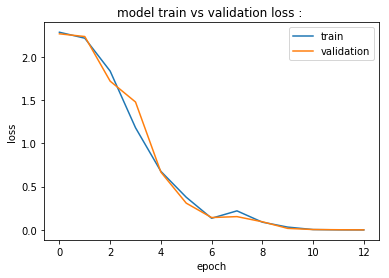

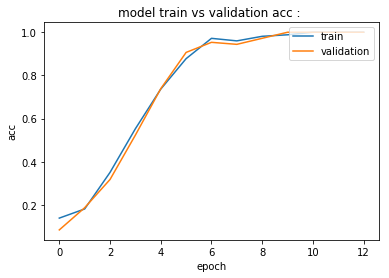

228/228 [==============================] - 0s 940us/step
Acc = 1.0
Loss = 0.0007670518177308207


In [17]:
# model 6
print("epochs = 15 min_delta = 0.1 patience = 4")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.1,patience=4,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model6.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 15 min_delta = 0.1 patience = 5
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2511 - acc: 0.1412 - val_loss: 2.2502 - val_acc: 0.1028
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2258 - acc: 0.1318 - val_loss: 2.2517 - val_acc: 0.1963
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1943 - acc: 0.1647 - val_loss: 2.2465 - val_acc: 0.0841
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 1.9141 - acc: 0.2941 - val_loss: 1.7796 - val_acc: 0.3551
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 1.4255 - acc: 0.4894 - val_loss: 1.3729 - val_acc: 0.4579
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 0.9680 - acc: 0.6118 - val_loss: 0.7432 - val_acc: 0.7290
Epoch 7/15
425/425 [==============================] - 1s 3ms/step - loss: 0.5947 - acc: 0.7953 - val_loss: 0.7309 - val_a

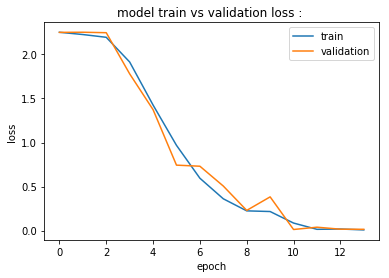

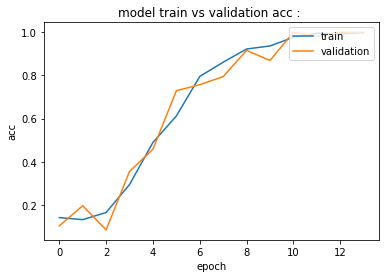

228/228 [==============================] - 0s 969us/step
Acc = 1.0
Loss = 0.014719946228229162


In [18]:
# model 7
print("epochs = 15 min_delta = 0.1 patience = 5")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.1,patience=5,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=15,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model7.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

In [11]:
m1=load_model('my_model1.h5')
m2=load_model('my_model2.h5')
m3=load_model('my_model3.h5')
m4=load_model('my_model4.h5')
m5=load_model('my_model5.h5')
m6=load_model('my_model6.h5')
m7=load_model('my_model7.h5')

In [12]:
import signal
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

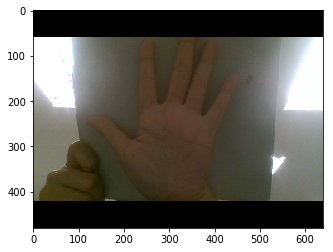

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break

In [20]:
m1.predict(frame,batch_size=None, verbose=0, steps=None)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (480, 640, 3)

epochs = 5 min_delta = 0.001 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2521 - acc: 0.1365 - val_loss: 2.2706 - val_acc: 0.1495
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 2.1459 - acc: 0.2141 - val_loss: 1.9682 - val_acc: 0.1869
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 1.4276 - acc: 0.4918 - val_loss: 1.3780 - val_acc: 0.6449
Epoch 4/5
425/425 [==============================] - 1s 3ms/step - loss: 0.7271 - acc: 0.7553 - val_loss: 0.4070 - val_acc: 0.8785
Epoch 5/5
425/425 [==============================] - 1s 4ms/step - loss: 0.2627 - acc: 0.9271 - val_loss: 0.2444 - val_acc: 0.9346


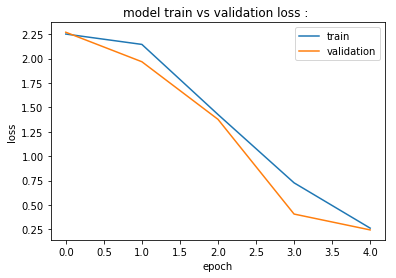

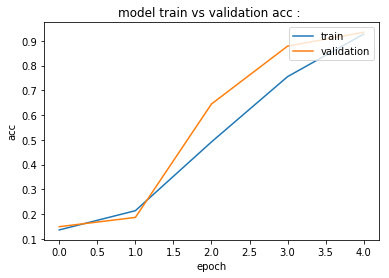

228/228 [==============================] - 0s 956us/step
Acc = 0.9517543859649122
Loss = 0.17299117121780128
epochs = 5 min_delta = 0.001 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2775 - acc: 0.1247 - val_loss: 2.2792 - val_acc: 0.0841
Epoch 2/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2207 - acc: 0.1506 - val_loss: 2.3474 - val_acc: 0.1308
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 2.1995 - acc: 0.1318 - val_loss: 2.2491 - val_acc: 0.2523


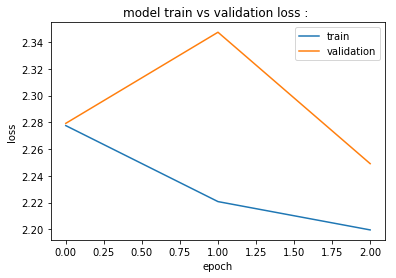

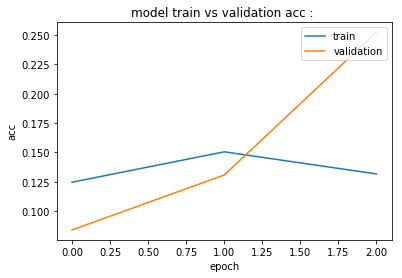

228/228 [==============================] - 0s 971us/step
Acc = 0.30701754385964913
Loss = 2.2007633008454976
epochs = 5 min_delta = 0.001 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2632 - acc: 0.1412 - val_loss: 2.2578 - val_acc: 0.1308
Epoch 2/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2197 - acc: 0.1365 - val_loss: 2.2624 - val_acc: 0.0841
Epoch 3/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2084 - acc: 0.1553 - val_loss: 2.2428 - val_acc: 0.0841
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 1.8575 - acc: 0.3106 - val_loss: 2.8668 - val_acc: 0.2336
Epoch 5/5
425/425 [==============================] - 1s 4ms/step - loss: 1.6216 - acc: 0.4235 - val_loss: 1.5636 - val_acc: 0.4206


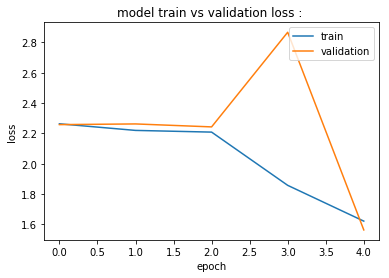

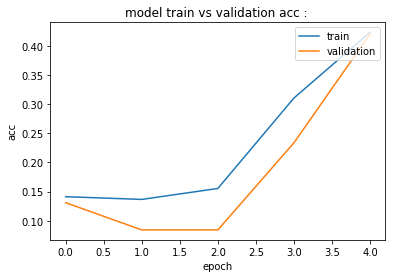

228/228 [==============================] - 0s 949us/step
Acc = 0.5175438596491229
Loss = 1.347018982234754
epochs = 5 min_delta = 0.001 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2502 - acc: 0.1435 - val_loss: 2.3196 - val_acc: 0.2243
Epoch 2/5
425/425 [==============================] - 2s 4ms/step - loss: 2.1571 - acc: 0.2024 - val_loss: 1.9230 - val_acc: 0.3084
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 1.4376 - acc: 0.4682 - val_loss: 1.5717 - val_acc: 0.4112
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 0.9797 - acc: 0.6212 - val_loss: 0.9469 - val_acc: 0.7196
Epoch 5/5
425/425 [==============================] - 1s 4ms/step - loss: 0.4354 - acc: 0.8541 - val_loss: 0.2470 - val_acc: 0.9065


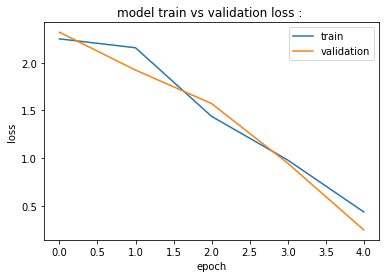

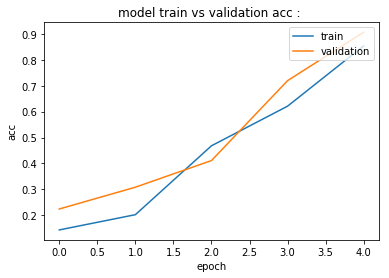

228/228 [==============================] - 0s 962us/step
Acc = 0.9429824561403509
Loss = 0.18210117388189884
epochs = 5 min_delta = 0.001 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2889 - acc: 0.1365 - val_loss: 2.2652 - val_acc: 0.1495
Epoch 2/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2420 - acc: 0.1318 - val_loss: 2.2737 - val_acc: 0.1308
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2100 - acc: 0.1435 - val_loss: 2.2598 - val_acc: 0.1495
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2025 - acc: 0.1365 - val_loss: 2.2444 - val_acc: 0.1308
Epoch 5/5
425/425 [==============================] - 1s 3ms/step - loss: 2.1846 - acc: 0.1929 - val_loss: 2.1756 - val_acc: 0.2336


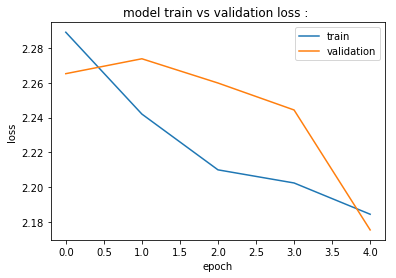

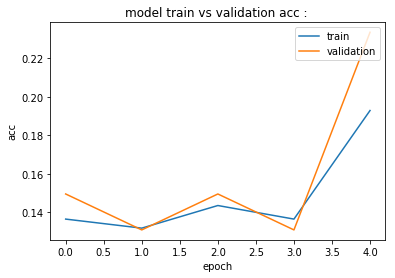

228/228 [==============================] - 0s 1ms/step
Acc = 0.30701754385964913
Loss = 2.0529488011410364
epochs = 5 min_delta = 0.01 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2295 - acc: 0.1694 - val_loss: 2.2927 - val_acc: 0.1963
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 1.7859 - acc: 0.3671 - val_loss: 1.6696 - val_acc: 0.3458
Epoch 3/5
425/425 [==============================] - 1s 3ms/step - loss: 1.2106 - acc: 0.5529 - val_loss: 0.7901 - val_acc: 0.6916
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 0.6169 - acc: 0.7953 - val_loss: 0.6050 - val_acc: 0.8505
Epoch 5/5
425/425 [==============================] - 1s 3ms/step - loss: 0.4326 - acc: 0.8659 - val_loss: 0.3831 - val_acc: 0.8598


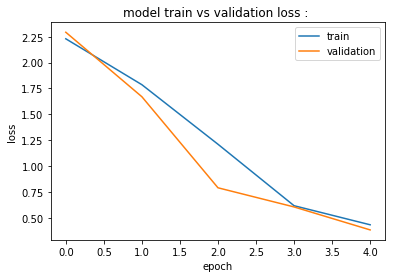

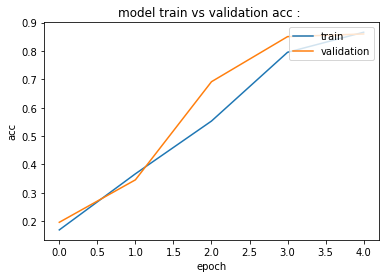

228/228 [==============================] - 0s 971us/step
Acc = 0.9078947368421053
Loss = 0.2702358349373466
epochs = 5 min_delta = 0.01 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2663 - acc: 0.1082 - val_loss: 2.2740 - val_acc: 0.1028
Epoch 2/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2325 - acc: 0.1106 - val_loss: 2.2705 - val_acc: 0.0841


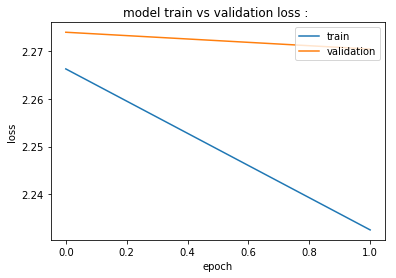

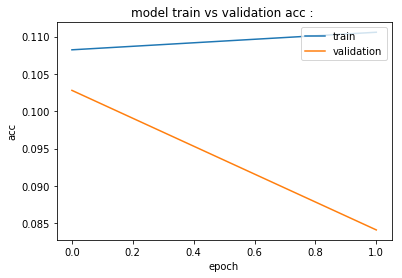

228/228 [==============================] - 0s 957us/step
Acc = 0.16228070175438597
Loss = 2.20675017540915
epochs = 5 min_delta = 0.01 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2697 - acc: 0.1318 - val_loss: 2.2965 - val_acc: 0.1028
Epoch 2/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2192 - acc: 0.1318 - val_loss: 2.3239 - val_acc: 0.1308
Epoch 3/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2027 - acc: 0.1718 - val_loss: 2.2457 - val_acc: 0.1963
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 1.9598 - acc: 0.3059 - val_loss: 2.1149 - val_acc: 0.2617
Epoch 5/5
425/425 [==============================] - 2s 4ms/step - loss: 1.4887 - acc: 0.4353 - val_loss: 1.2999 - val_acc: 0.3925


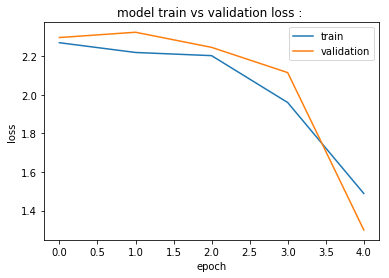

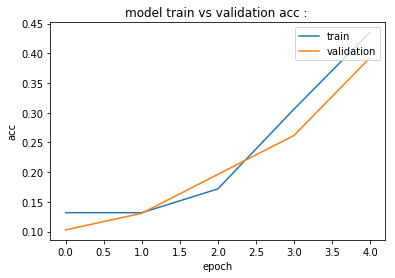

228/228 [==============================] - 0s 1ms/step
Acc = 0.4473684210526316
Loss = 1.133148195450766
epochs = 5 min_delta = 0.01 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2732 - acc: 0.1247 - val_loss: 2.3308 - val_acc: 0.0841
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2687 - acc: 0.0871 - val_loss: 2.3114 - val_acc: 0.0841
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2226 - acc: 0.1671 - val_loss: 2.2671 - val_acc: 0.1495
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 2.0361 - acc: 0.2800 - val_loss: 1.6171 - val_acc: 0.4299
Epoch 5/5
425/425 [==============================] - 1s 3ms/step - loss: 1.4084 - acc: 0.4871 - val_loss: 1.4021 - val_acc: 0.4112


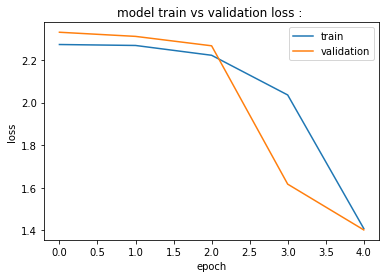

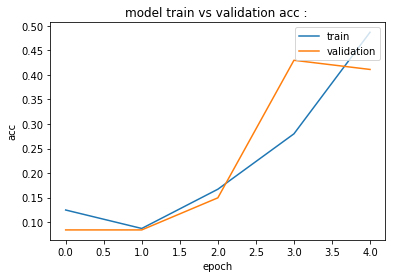

228/228 [==============================] - 0s 968us/step
Acc = 0.5701754385964912
Loss = 1.1290973090288932
epochs = 5 min_delta = 0.01 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.3070 - acc: 0.1271 - val_loss: 2.3048 - val_acc: 0.0841
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2193 - acc: 0.1576 - val_loss: 2.2761 - val_acc: 0.0841
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 1.8578 - acc: 0.3059 - val_loss: 1.7301 - val_acc: 0.3551
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 1.5032 - acc: 0.4682 - val_loss: 1.5500 - val_acc: 0.4393
Epoch 5/5
425/425 [==============================] - 1s 4ms/step - loss: 1.1644 - acc: 0.5341 - val_loss: 0.9358 - val_acc: 0.6355


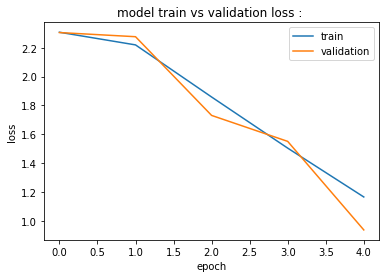

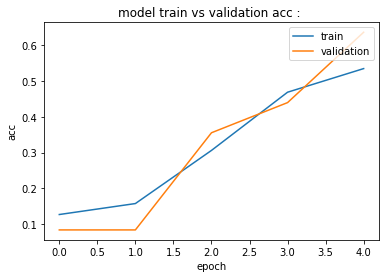

228/228 [==============================] - 0s 972us/step
Acc = 0.793859649122807
Loss = 0.7607070793185318
epochs = 5 min_delta = 0.1 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2676 - acc: 0.1412 - val_loss: 2.2707 - val_acc: 0.1028
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2360 - acc: 0.1388 - val_loss: 2.2483 - val_acc: 0.0841


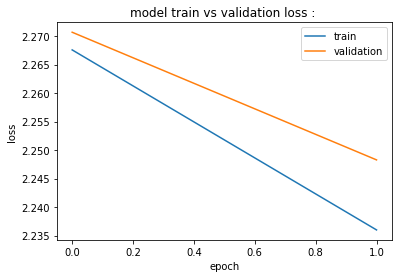

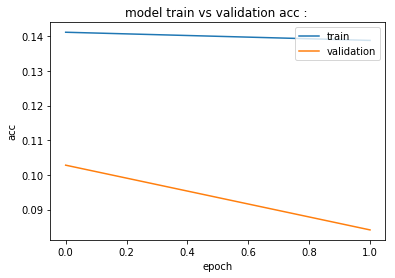

228/228 [==============================] - ETA:  - 0s 966us/step
Acc = 0.16228070175438597
Loss = 2.1973710311086556
epochs = 5 min_delta = 0.1 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2428 - acc: 0.1788 - val_loss: 2.2823 - val_acc: 0.0841
Epoch 2/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2317 - acc: 0.1412 - val_loss: 2.2798 - val_acc: 0.1028


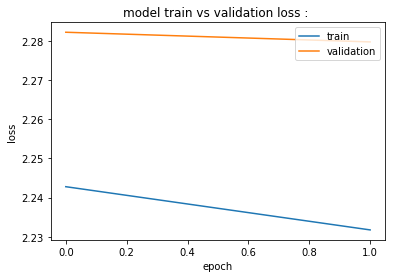

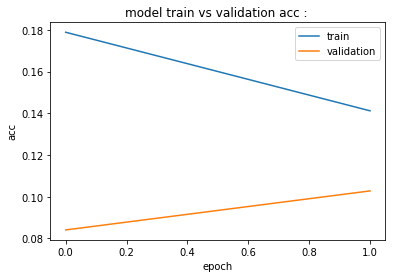

228/228 [==============================] - 0s 949us/step
Acc = 0.09210526315789473
Loss = 2.2365388786583615
epochs = 5 min_delta = 0.1 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2488 - acc: 0.1576 - val_loss: 2.2853 - val_acc: 0.1308
Epoch 2/5
425/425 [==============================] - 1s 4ms/step - loss: 2.2302 - acc: 0.1600 - val_loss: 2.2572 - val_acc: 0.1776
Epoch 3/5
425/425 [==============================] - 1s 4ms/step - loss: 2.1910 - acc: 0.1718 - val_loss: 2.2955 - val_acc: 0.1308


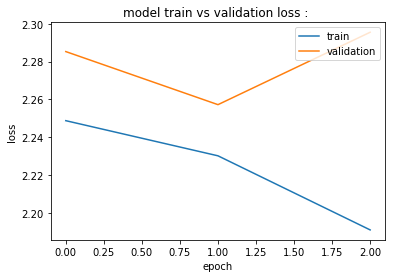

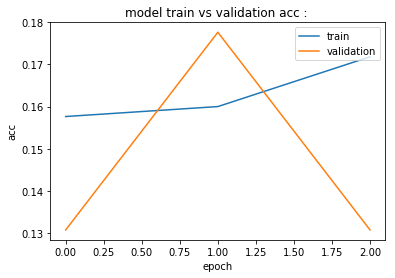

228/228 [==============================] - 0s 1ms/step
Acc = 0.16228070175438597
Loss = 2.1938020555596602
epochs = 5 min_delta = 0.1 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2680 - acc: 0.1388 - val_loss: 2.4011 - val_acc: 0.1495
Epoch 2/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2542 - acc: 0.1459 - val_loss: 2.2668 - val_acc: 0.1308
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2042 - acc: 0.1624 - val_loss: 2.2656 - val_acc: 0.0841
Epoch 4/5
425/425 [==============================] - 2s 4ms/step - loss: 1.8621 - acc: 0.3765 - val_loss: 1.6771 - val_acc: 0.4019
Epoch 5/5
425/425 [==============================] - 1s 3ms/step - loss: 1.3799 - acc: 0.4847 - val_loss: 1.3939 - val_acc: 0.4019


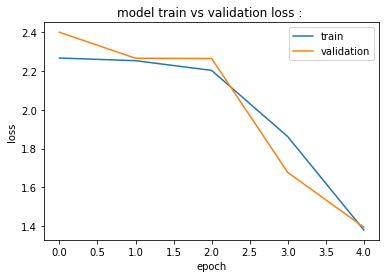

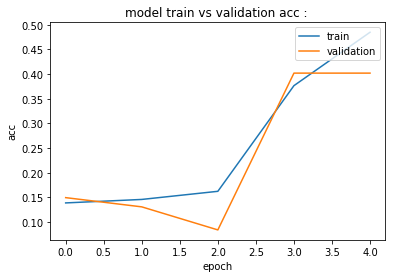

228/228 [==============================] - 0s 986us/step
Acc = 0.4517543859649123
Loss = 1.266573102850663
epochs = 5 min_delta = 0.1 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2756 - acc: 0.1271 - val_loss: 2.2612 - val_acc: 0.1308
Epoch 2/5
425/425 [==============================] - 1s 3ms/step - loss: 2.2264 - acc: 0.1671 - val_loss: 2.2595 - val_acc: 0.1963
Epoch 3/5
425/425 [==============================] - 2s 4ms/step - loss: 2.2006 - acc: 0.1718 - val_loss: 2.2479 - val_acc: 0.1869
Epoch 4/5
425/425 [==============================] - 1s 4ms/step - loss: 2.0788 - acc: 0.2424 - val_loss: 1.9128 - val_acc: 0.2710
Epoch 5/5
425/425 [==============================] - 2s 4ms/step - loss: 1.5950 - acc: 0.4329 - val_loss: 1.4389 - val_acc: 0.4766


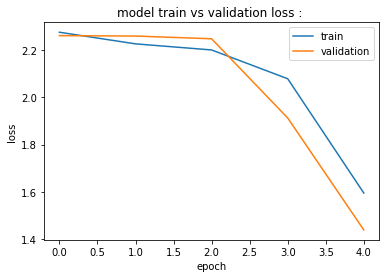

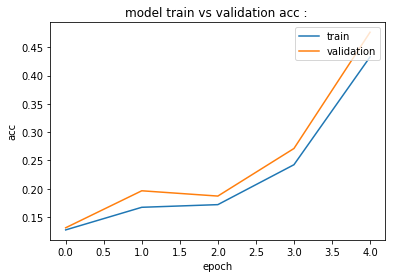

228/228 [==============================] - 0s 1ms/step
Acc = 0.5219298245614035
Loss = 1.2981428493533218
epochs = 10 min_delta = 0.001 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2628 - acc: 0.1341 - val_loss: 2.2770 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2397 - acc: 0.1365 - val_loss: 2.2739 - val_acc: 0.1495
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2181 - acc: 0.1435 - val_loss: 2.2582 - val_acc: 0.0841
Epoch 4/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2008 - acc: 0.1365 - val_loss: 2.2908 - val_acc: 0.1308


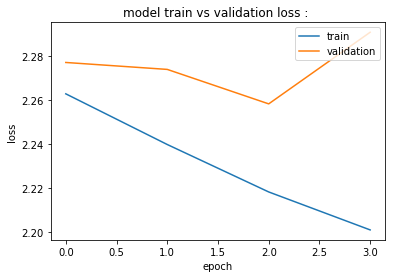

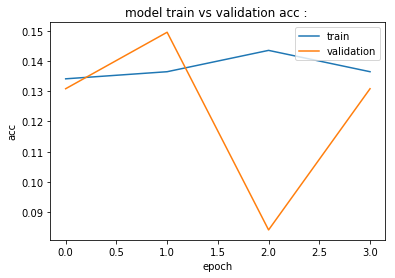

228/228 [==============================] - 0s 1000us/step
Acc = 0.14035087719298245
Loss = 2.218354166599742
epochs = 10 min_delta = 0.001 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2610 - acc: 0.1200 - val_loss: 2.2749 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2324 - acc: 0.1529 - val_loss: 2.2637 - val_acc: 0.0841
Epoch 3/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2384 - acc: 0.1529 - val_loss: 2.2690 - val_acc: 0.1308


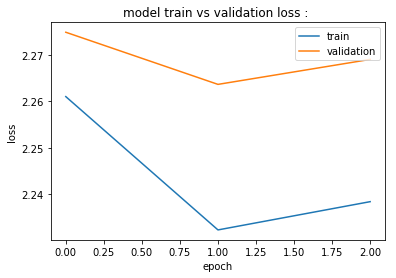

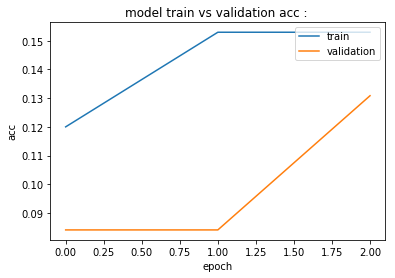

228/228 [==============================] - 0s 971us/step
Acc = 0.14035087719298245
Loss = 2.2175946988557516
epochs = 10 min_delta = 0.001 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2668 - acc: 0.1271 - val_loss: 2.2691 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2277 - acc: 0.1529 - val_loss: 2.2610 - val_acc: 0.0841
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2134 - acc: 0.1718 - val_loss: 2.2636 - val_acc: 0.1308
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 2.1857 - acc: 0.2047 - val_loss: 2.2008 - val_acc: 0.1869
Epoch 5/10
425/425 [==============================] - 1s 3ms/step - loss: 1.8351 - acc: 0.3624 - val_loss: 1.7489 - val_acc: 0.2897
Epoch 6/10
425/425 [==============================] - 2s 4ms/step - loss: 1.4109 - acc: 0.4424 - val_loss: 1.3047 - val_acc: 0.5140
Epoch 7/10

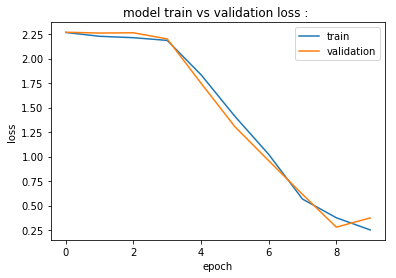

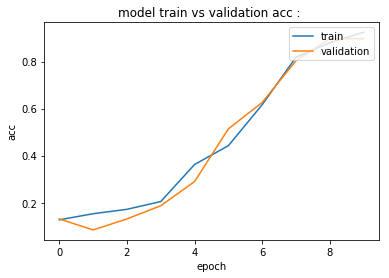

228/228 [==============================] - 0s 997us/step
Acc = 0.9210526315789473
Loss = 0.25586345085972234
epochs = 10 min_delta = 0.001 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2524 - acc: 0.0800 - val_loss: 2.2984 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2435 - acc: 0.1341 - val_loss: 2.3086 - val_acc: 0.1308
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2112 - acc: 0.1788 - val_loss: 2.2817 - val_acc: 0.0841
Epoch 4/10
425/425 [==============================] - 1s 4ms/step - loss: 1.9635 - acc: 0.3012 - val_loss: 1.7355 - val_acc: 0.3178
Epoch 5/10
425/425 [==============================] - 2s 4ms/step - loss: 1.1544 - acc: 0.6118 - val_loss: 0.8930 - val_acc: 0.5794
Epoch 6/10
425/425 [==============================] - 2s 4ms/step - loss: 0.5273 - acc: 0.8165 - val_loss: 0.3487 - val_acc: 0.8785
Epoch 7/10

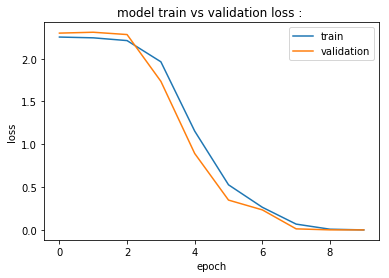

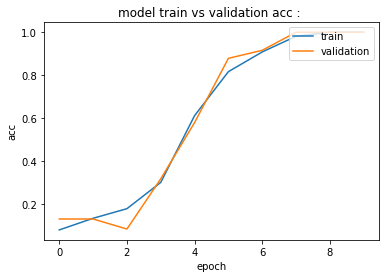

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.0003187018119844428
epochs = 10 min_delta = 0.001 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2637 - acc: 0.1482 - val_loss: 2.2721 - val_acc: 0.1682
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2464 - acc: 0.1224 - val_loss: 2.2676 - val_acc: 0.0841
Epoch 3/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2139 - acc: 0.1553 - val_loss: 2.2622 - val_acc: 0.0841
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 2.1560 - acc: 0.2353 - val_loss: 2.1439 - val_acc: 0.2150
Epoch 5/10
425/425 [==============================] - 2s 4ms/step - loss: 1.7042 - acc: 0.3788 - val_loss: 1.5227 - val_acc: 0.4206
Epoch 6/10
425/425 [==============================] - 2s 4ms/step - loss: 1.2081 - acc: 0.5388 - val_loss: 1.0726 - val_acc: 0.5981
Epoch 7/10
425/425 [=====

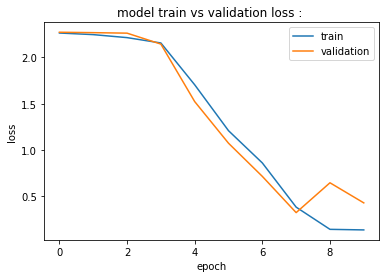

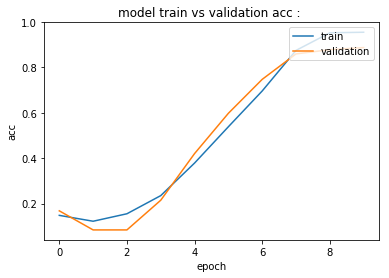

228/228 [==============================] - 0s 1ms/step
Acc = 0.9078947368421053
Loss = 0.21516379877402073
epochs = 10 min_delta = 0.01 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2531 - acc: 0.1271 - val_loss: 2.2959 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2282 - acc: 0.1365 - val_loss: 2.2556 - val_acc: 0.1495


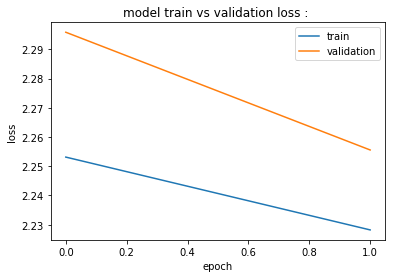

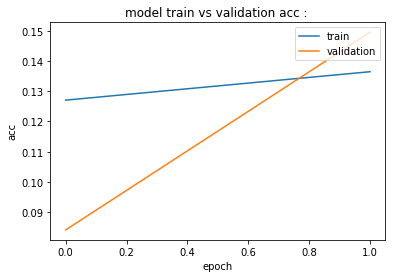

228/228 [==============================] - 0s 978us/step
Acc = 0.14473684210526316
Loss = 2.2319667130185845
epochs = 10 min_delta = 0.01 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2671 - acc: 0.1106 - val_loss: 2.2709 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2317 - acc: 0.1553 - val_loss: 2.2739 - val_acc: 0.1495
Epoch 3/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2075 - acc: 0.1412 - val_loss: 2.2627 - val_acc: 0.0841


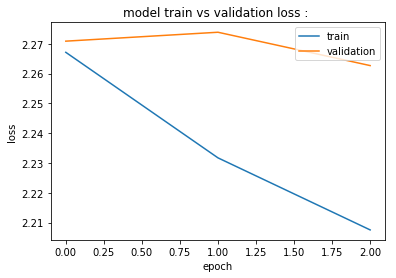

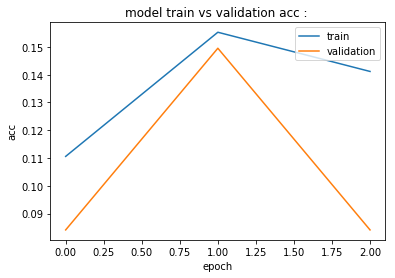

228/228 [==============================] - 0s 954us/step
Acc = 0.16228070175438597
Loss = 2.2042413343463028
epochs = 10 min_delta = 0.01 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2761 - acc: 0.1106 - val_loss: 2.2722 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2206 - acc: 0.1671 - val_loss: 2.2387 - val_acc: 0.1308
Epoch 3/10
425/425 [==============================] - 2s 4ms/step - loss: 1.9669 - acc: 0.2776 - val_loss: 1.8576 - val_acc: 0.3832
Epoch 4/10
425/425 [==============================] - 1s 3ms/step - loss: 1.5579 - acc: 0.4047 - val_loss: 1.5663 - val_acc: 0.4299
Epoch 5/10
425/425 [==============================] - 1s 4ms/step - loss: 1.1660 - acc: 0.5624 - val_loss: 1.1523 - val_acc: 0.4953
Epoch 6/10
425/425 [==============================] - 1s 4ms/step - loss: 0.7848 - acc: 0.7247 - val_loss: 0.5821 - val_acc: 0.8131
Epoch 7/10


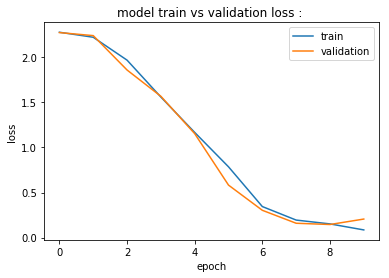

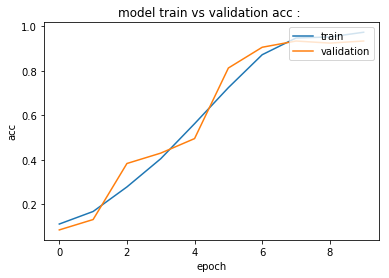

228/228 [==============================] - 0s 962us/step
Acc = 0.9692982456140351
Loss = 0.11455791624132217
epochs = 10 min_delta = 0.01 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2807 - acc: 0.1200 - val_loss: 2.2762 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2245 - acc: 0.1529 - val_loss: 2.3016 - val_acc: 0.1495
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2109 - acc: 0.1576 - val_loss: 2.2551 - val_acc: 0.2056
Epoch 4/10
425/425 [==============================] - 1s 4ms/step - loss: 2.1538 - acc: 0.2400 - val_loss: 2.1345 - val_acc: 0.2430
Epoch 5/10
425/425 [==============================] - 1s 4ms/step - loss: 1.5936 - acc: 0.4141 - val_loss: 1.2736 - val_acc: 0.6168
Epoch 6/10
425/425 [==============================] - 1s 4ms/step - loss: 1.0349 - acc: 0.6353 - val_loss: 0.9626 - val_acc: 0.6636
Epoch 7/10


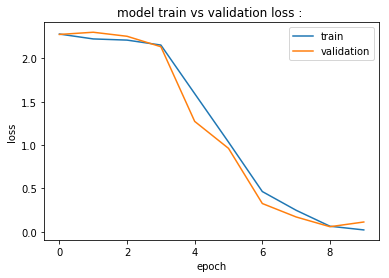

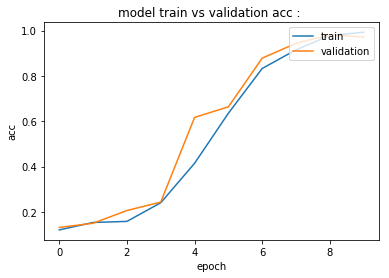

228/228 [==============================] - 0s 980us/step
Acc = 0.9956140350877193
Loss = 0.030294458422679128
epochs = 10 min_delta = 0.01 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2696 - acc: 0.1318 - val_loss: 2.2543 - val_acc: 0.1495
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2244 - acc: 0.1435 - val_loss: 2.2567 - val_acc: 0.0841
Epoch 3/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2078 - acc: 0.1341 - val_loss: 2.2649 - val_acc: 0.0841
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 2.0830 - acc: 0.2894 - val_loss: 1.8524 - val_acc: 0.2710
Epoch 5/10
425/425 [==============================] - 2s 4ms/step - loss: 1.5703 - acc: 0.4212 - val_loss: 1.4886 - val_acc: 0.3738
Epoch 6/10
425/425 [==============================] - 2s 4ms/step - loss: 1.1661 - acc: 0.5647 - val_loss: 0.8902 - val_acc: 0.6636
Epoch 7/10

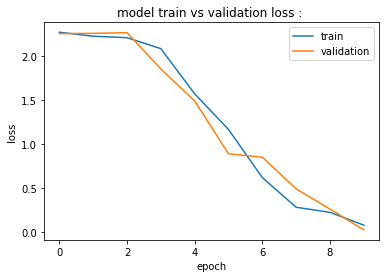

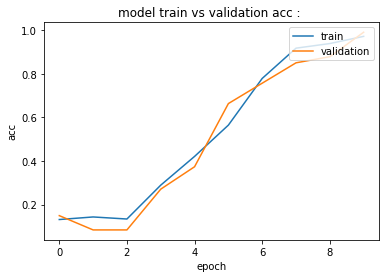

228/228 [==============================] - 0s 999us/step
Acc = 0.9912280701754386
Loss = 0.017526332190946528
epochs = 10 min_delta = 0.1 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2758 - acc: 0.1200 - val_loss: 2.2726 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2309 - acc: 0.1600 - val_loss: 2.2864 - val_acc: 0.0841


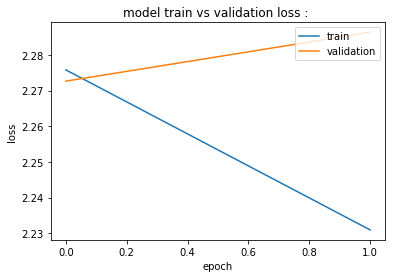

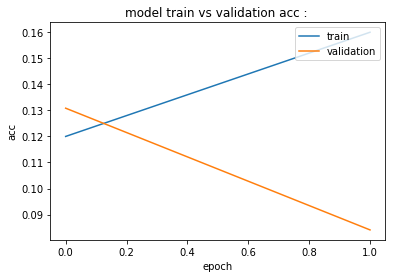

228/228 [==============================] - 0s 991us/step
Acc = 0.16228070175438597
Loss = 2.2259473717003537
epochs = 10 min_delta = 0.1 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2411 - acc: 0.1271 - val_loss: 2.2717 - val_acc: 0.0841
Epoch 2/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2208 - acc: 0.1624 - val_loss: 2.2730 - val_acc: 0.1308


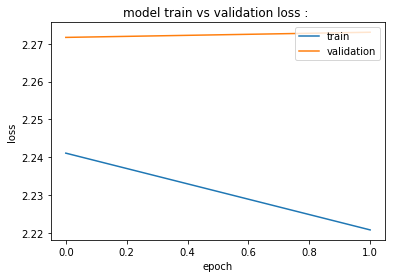

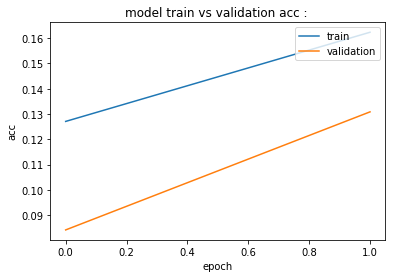

228/228 [==============================] - 0s 1ms/step
Acc = 0.14035087719298245
Loss = 2.1911390915251614
epochs = 10 min_delta = 0.1 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2375 - acc: 0.1529 - val_loss: 2.2725 - val_acc: 0.1308
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.0056 - acc: 0.2659 - val_loss: 1.7254 - val_acc: 0.3178
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 1.4202 - acc: 0.5059 - val_loss: 1.1620 - val_acc: 0.5794
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 0.8362 - acc: 0.6918 - val_loss: 1.1499 - val_acc: 0.5701
Epoch 5/10
425/425 [==============================] - 1s 3ms/step - loss: 0.5724 - acc: 0.8071 - val_loss: 0.4782 - val_acc: 0.8598
Epoch 6/10
425/425 [==============================] - 1s 3ms/step - loss: 0.2370 - acc: 0.9318 - val_loss: 0.2173 - val_acc: 0.9159
Epoch 7/10
425

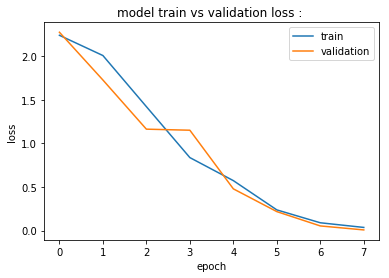

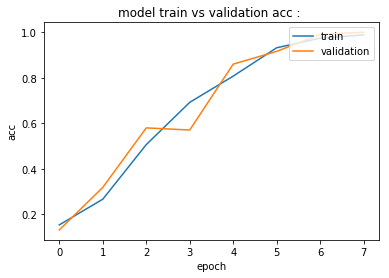

228/228 [==============================] - 0s 1ms/step
Acc = 0.9956140350877193
Loss = 0.017363240541926006
epochs = 10 min_delta = 0.1 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2382 - acc: 0.1553 - val_loss: 2.3100 - val_acc: 0.1028
Epoch 2/10
425/425 [==============================] - 1s 3ms/step - loss: 2.2272 - acc: 0.1388 - val_loss: 2.2599 - val_acc: 0.1308
Epoch 3/10
425/425 [==============================] - 1s 4ms/step - loss: 2.2162 - acc: 0.1435 - val_loss: 2.2568 - val_acc: 0.1495
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 2.1932 - acc: 0.1529 - val_loss: 2.2402 - val_acc: 0.0841


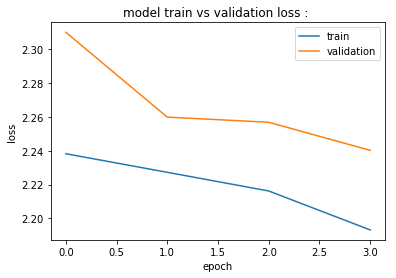

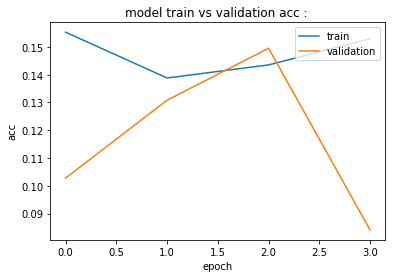

228/228 [==============================] - 0s 1ms/step
Acc = 0.16228070175438597
Loss = 2.161584494406717
epochs = 10 min_delta = 0.1 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2545 - acc: 0.1271 - val_loss: 2.2645 - val_acc: 0.1028
Epoch 2/10
425/425 [==============================] - 2s 4ms/step - loss: 2.2325 - acc: 0.1671 - val_loss: 2.2318 - val_acc: 0.1495
Epoch 3/10
425/425 [==============================] - 2s 4ms/step - loss: 1.9418 - acc: 0.2847 - val_loss: 1.6280 - val_acc: 0.3738
Epoch 4/10
425/425 [==============================] - 2s 4ms/step - loss: 1.5224 - acc: 0.4329 - val_loss: 1.2516 - val_acc: 0.4766
Epoch 5/10
425/425 [==============================] - 1s 4ms/step - loss: 1.0096 - acc: 0.6518 - val_loss: 1.0904 - val_acc: 0.5888
Epoch 6/10
425/425 [==============================] - 2s 4ms/step - loss: 0.6309 - acc: 0.8000 - val_loss: 0.4838 - val_acc: 0.8692
Epoch 7/10
425/

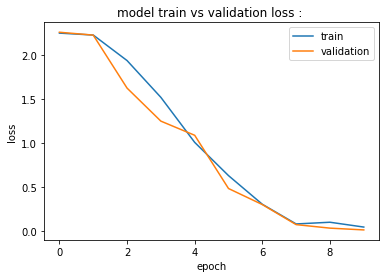

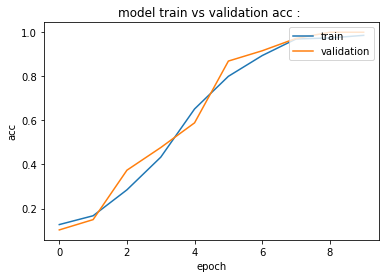

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.007204540885715305
epochs = 15 min_delta = 0.001 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2573 - acc: 0.1624 - val_loss: 2.2638 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2290 - acc: 0.1576 - val_loss: 2.2515 - val_acc: 0.1495


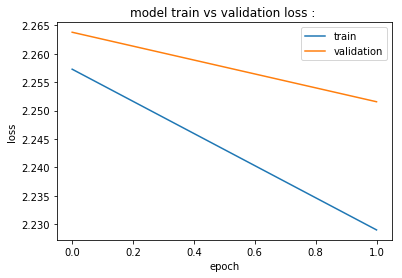

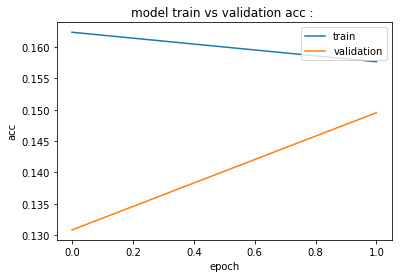

228/228 [==============================] - 0s 1ms/step
Acc = 0.14473684210526316
Loss = 2.2036375623000297
epochs = 15 min_delta = 0.001 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2835 - acc: 0.1553 - val_loss: 2.2570 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2221 - acc: 0.1506 - val_loss: 2.2669 - val_acc: 0.0841


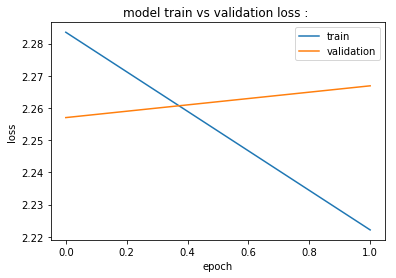

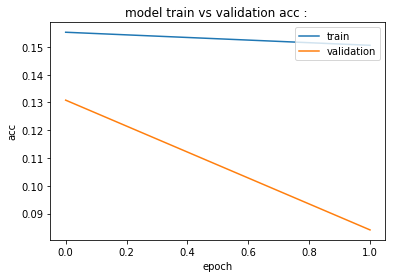

228/228 [==============================] - 0s 957us/step
Acc = 0.16228070175438597
Loss = 2.2052109283313417
epochs = 15 min_delta = 0.001 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2578 - acc: 0.1412 - val_loss: 2.2626 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2137 - acc: 0.1624 - val_loss: 2.3309 - val_acc: 0.1495
Epoch 3/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2047 - acc: 0.1741 - val_loss: 2.2526 - val_acc: 0.0841
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 2.0755 - acc: 0.2894 - val_loss: 1.8907 - val_acc: 0.2243
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 1.4497 - acc: 0.4541 - val_loss: 1.6835 - val_acc: 0.4299
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 1.0072 - acc: 0.6376 - val_loss: 0.7987 - val_acc: 0.7383
Epoch 7/15

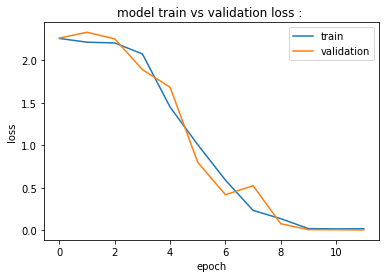

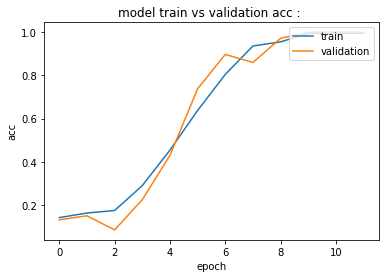

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.0019534884996940953
epochs = 15 min_delta = 0.001 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2688 - acc: 0.1318 - val_loss: 2.2677 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2267 - acc: 0.1365 - val_loss: 2.2548 - val_acc: 0.1308
Epoch 3/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2077 - acc: 0.1482 - val_loss: 2.2833 - val_acc: 0.0841
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2043 - acc: 0.1459 - val_loss: 2.2594 - val_acc: 0.0841
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1790 - acc: 0.2118 - val_loss: 2.2317 - val_acc: 0.1869
Epoch 6/15
425/425 [==============================] - 1s 4ms/step - loss: 1.8250 - acc: 0.3412 - val_loss: 1.6814 - val_acc: 0.2897
Epoch 7/15
425/425 [=====

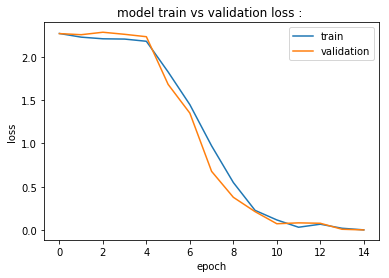

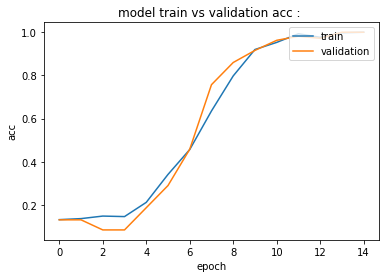

228/228 [==============================] - 0s 931us/step
Acc = 1.0
Loss = 0.0005738447479527901
epochs = 15 min_delta = 0.001 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2743 - acc: 0.1529 - val_loss: 2.2514 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2292 - acc: 0.1553 - val_loss: 2.2554 - val_acc: 0.1495
Epoch 3/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2087 - acc: 0.1671 - val_loss: 2.2648 - val_acc: 0.1869
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.1994 - acc: 0.1576 - val_loss: 2.3242 - val_acc: 0.1308
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1554 - acc: 0.2353 - val_loss: 2.1688 - val_acc: 0.1963
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 1.6418 - acc: 0.4094 - val_loss: 1.4526 - val_acc: 0.4112
Epoch 7/15
425/425 [===

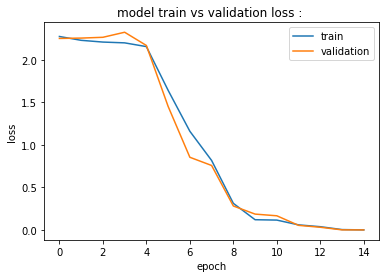

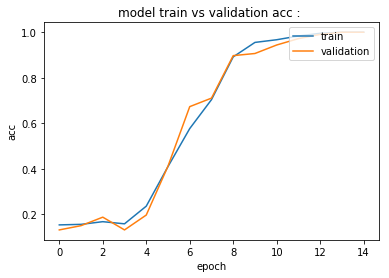

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.0017160899088263218
epochs = 15 min_delta = 0.01 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2725 - acc: 0.1176 - val_loss: 2.2361 - val_acc: 0.1495
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2332 - acc: 0.1294 - val_loss: 2.2714 - val_acc: 0.1495
Epoch 3/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2131 - acc: 0.1459 - val_loss: 2.2676 - val_acc: 0.0841
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.1977 - acc: 0.1741 - val_loss: 2.2179 - val_acc: 0.2243
Epoch 5/15
425/425 [==============================] - 2s 4ms/step - loss: 1.8599 - acc: 0.3341 - val_loss: 1.5240 - val_acc: 0.4206
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 1.2250 - acc: 0.5600 - val_loss: 1.3691 - val_acc: 0.5888
Epoch 7/15
425/425 [======

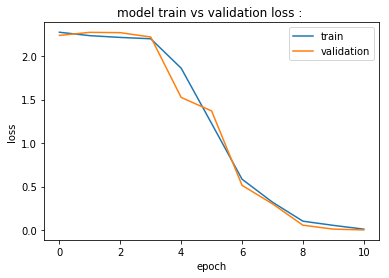

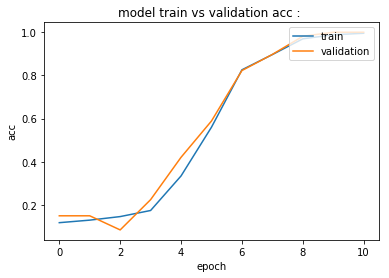

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.0016891995622069786
epochs = 15 min_delta = 0.01 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2652 - acc: 0.1482 - val_loss: 2.2809 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2478 - acc: 0.1153 - val_loss: 2.2914 - val_acc: 0.1308


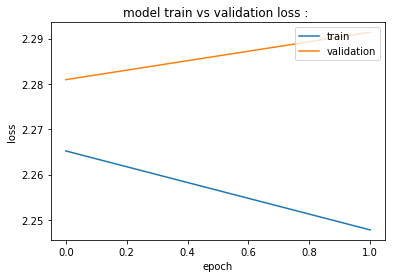

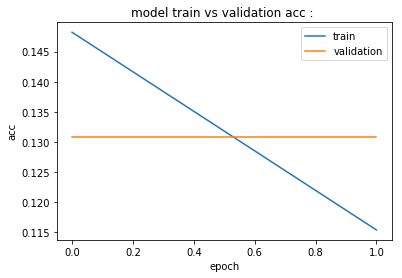

228/228 [==============================] - 0s 1ms/step
Acc = 0.14035087719298245
Loss = 2.218303529839767
epochs = 15 min_delta = 0.01 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2746 - acc: 0.1271 - val_loss: 2.2528 - val_acc: 0.1495
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2161 - acc: 0.1482 - val_loss: 2.2991 - val_acc: 0.0841
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2180 - acc: 0.1459 - val_loss: 2.2558 - val_acc: 0.1589
Epoch 4/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2164 - acc: 0.1482 - val_loss: 2.3045 - val_acc: 0.1495


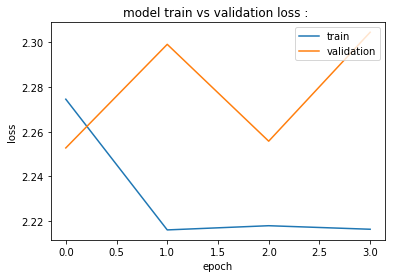

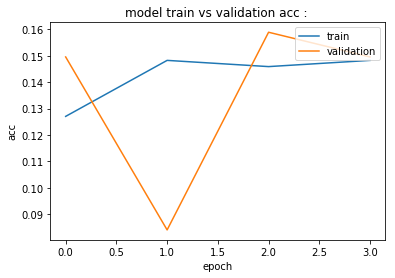

228/228 [==============================] - 0s 961us/step
Acc = 0.14473684210526316
Loss = 2.2239844506247
epochs = 15 min_delta = 0.01 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2531 - acc: 0.1459 - val_loss: 2.2963 - val_acc: 0.1682
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2200 - acc: 0.1412 - val_loss: 2.2589 - val_acc: 0.1308
Epoch 3/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2046 - acc: 0.1341 - val_loss: 2.2486 - val_acc: 0.2710
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.1635 - acc: 0.1976 - val_loss: 2.0786 - val_acc: 0.1963
Epoch 5/15
425/425 [==============================] - 2s 4ms/step - loss: 1.6948 - acc: 0.3882 - val_loss: 1.4700 - val_acc: 0.4112
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 1.2137 - acc: 0.5506 - val_loss: 1.2873 - val_acc: 0.5327
Epoch 7/15
425

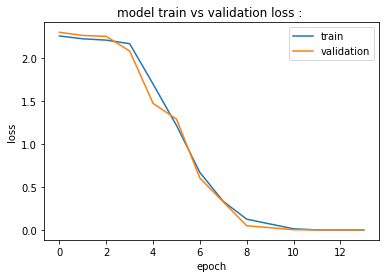

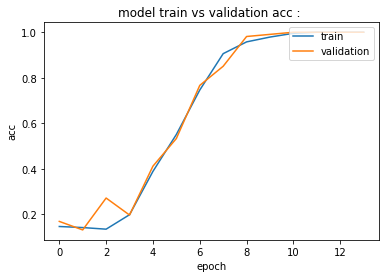

228/228 [==============================] - 0s 993us/step
Acc = 1.0
Loss = 0.00017680460175477876
epochs = 15 min_delta = 0.01 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2825 - acc: 0.1271 - val_loss: 2.2661 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2147 - acc: 0.1459 - val_loss: 2.2635 - val_acc: 0.1495
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1974 - acc: 0.1388 - val_loss: 2.3969 - val_acc: 0.1308
Epoch 4/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2059 - acc: 0.1953 - val_loss: 2.2466 - val_acc: 0.1963
Epoch 5/15
425/425 [==============================] - 1s 3ms/step - loss: 1.7620 - acc: 0.3835 - val_loss: 1.7097 - val_acc: 0.3832
Epoch 6/15
425/425 [==============================] - 1s 3ms/step - loss: 1.3808 - acc: 0.5318 - val_loss: 1.0716 - val_acc: 0.6075
Epoch 7/15
425/425 [===

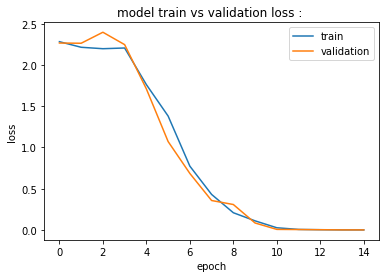

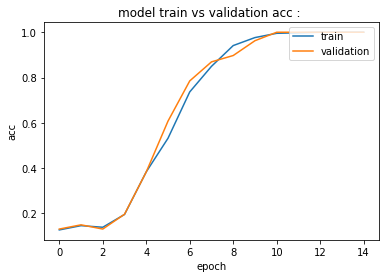

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.0002062908975028876
epochs = 15 min_delta = 0.1 patience = 0
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2699 - acc: 0.1459 - val_loss: 2.3982 - val_acc: 0.0841
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2183 - acc: 0.1576 - val_loss: 2.2767 - val_acc: 0.1308


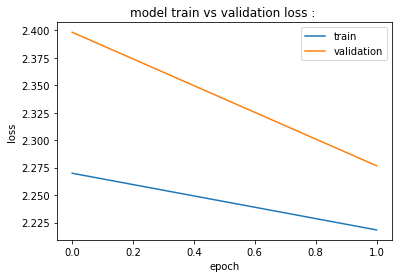

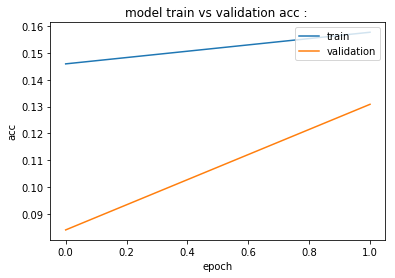

228/228 [==============================] - 0s 1ms/step
Acc = 0.14035087719298245
Loss = 2.230585922274673
epochs = 15 min_delta = 0.1 patience = 1
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2735 - acc: 0.1412 - val_loss: 2.2583 - val_acc: 0.0841
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2195 - acc: 0.1388 - val_loss: 2.2831 - val_acc: 0.0841


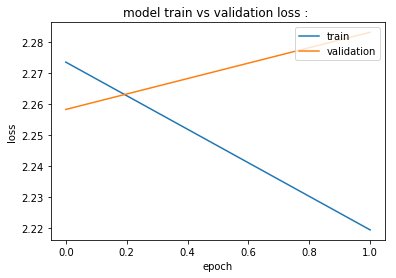

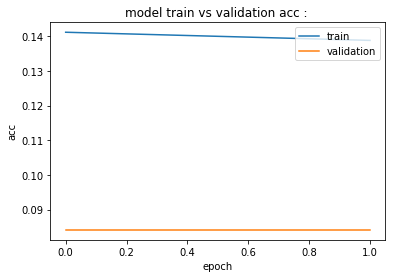

228/228 [==============================] - 0s 959us/step
Acc = 0.16228070175438597
Loss = 2.207331565388462
epochs = 15 min_delta = 0.1 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2568 - acc: 0.1529 - val_loss: 2.2621 - val_acc: 0.0841
Epoch 2/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2226 - acc: 0.1718 - val_loss: 2.2632 - val_acc: 0.1308
Epoch 3/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2165 - acc: 0.1553 - val_loss: 2.2587 - val_acc: 0.1308


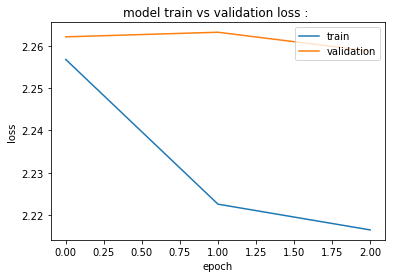

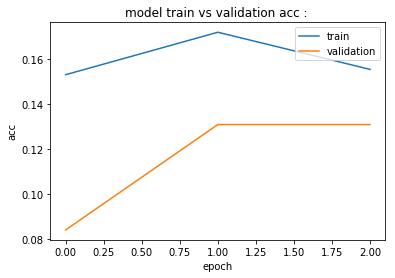

228/228 [==============================] - 0s 963us/step
Acc = 0.14035087719298245
Loss = 2.2068426860006234
epochs = 15 min_delta = 0.1 patience = 3
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 4ms/step - loss: 2.2648 - acc: 0.1435 - val_loss: 2.2712 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2465 - acc: 0.1553 - val_loss: 2.2589 - val_acc: 0.1308
Epoch 3/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2169 - acc: 0.1553 - val_loss: 2.2596 - val_acc: 0.0841
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2036 - acc: 0.1482 - val_loss: 2.2454 - val_acc: 0.1869


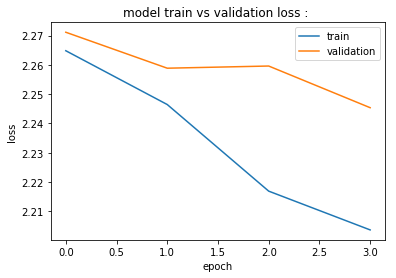

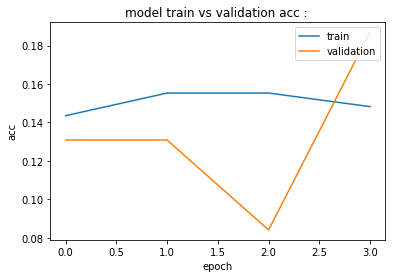

228/228 [==============================] - 0s 946us/step
Acc = 0.3026315789473684
Loss = 2.188780424887674
epochs = 15 min_delta = 0.1 patience = 4
Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 1s 3ms/step - loss: 2.2792 - acc: 0.1035 - val_loss: 2.2619 - val_acc: 0.1308
Epoch 2/15
425/425 [==============================] - 1s 3ms/step - loss: 2.1971 - acc: 0.1576 - val_loss: 2.1833 - val_acc: 0.2336
Epoch 3/15
425/425 [==============================] - 1s 4ms/step - loss: 1.7406 - acc: 0.3765 - val_loss: 1.7068 - val_acc: 0.2991
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 1.1993 - acc: 0.5624 - val_loss: 0.9609 - val_acc: 0.6822
Epoch 5/15
425/425 [==============================] - 2s 4ms/step - loss: 0.8313 - acc: 0.6918 - val_loss: 0.8145 - val_acc: 0.6636
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 0.4291 - acc: 0.8588 - val_loss: 0.3740 - val_acc: 0.8785
Epoch 7/15
425

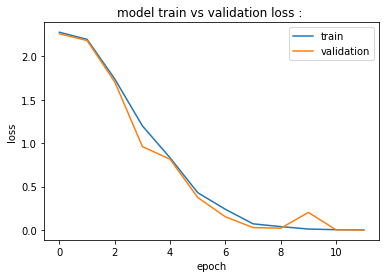

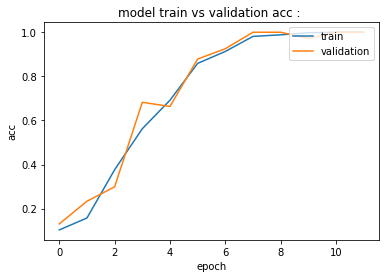

228/228 [==============================] - 0s 1ms/step
Acc = 1.0
Loss = 0.00012606976088136435


In [16]:
# loop find epochs,min_delta,patience
for i in range(5,20,5):
    for j in range(-3,0):
        for k in range(5):
            model.load_weights('weights.h5py')
            print("epochs = "+str(i)+" min_delta = "+str(pow(10,j))+" patience = "+str(k))
            es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=pow(10,j),patience=k,verbose=0,mode='auto')#min_delta=0.1,patience=5
            history=model.fit(x_train, y_train,
                      batch_size=16,
                      epochs=i,
                      validation_split=0.2,
                      callbacks=[es]) #epochs=15
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title("model train vs validation loss : ")
            plt.ylabel("loss")
            plt.xlabel("epoch")
            plt.legend(['train','validation'],loc='upper right')
            plt.show( )
            plt.plot(history.history['acc'])
            plt.plot(history.history['val_acc'])
            plt.title("model train vs validation acc : ")
            plt.ylabel("acc")
            plt.xlabel("epoch")
            plt.legend(['train','validation'],loc='upper right')
            plt.show( )
#             fig,(ax0,ax1)=plt.subplots(1,2)
#             ax0.plot(history.history['loss'])
#             ax0.plot(history.history['val_loss'])
#             ax0.set_title("model train vs validation loss : ")
#             ax0.set_ylabel("loss")
#             ax0.set_xlabel("epoch")
#             ax0.legend(['train','validation'],loc='upper right')
#             ax1.plot(history.history['acc'])
#             ax1.plot(history.history['val_acc'])
#             ax1.set_title("model train vs validation acc : ")
#             ax1.set_ylabel("acc")
#             ax1.set_xlabel("epoch")
#             ax1.legend(['train','validation'],loc='upper right')
#             plt.show( )
            loss,acc = model.evaluate(x_test,y_test)
            print("Acc = " + str(acc))
            print("Loss = " + str(loss))

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
y_train.shape

(532, 10, 10)

In [87]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train on 425 samples, validate on 107 samples
Epoch 1/15
425/425 [==============================] - 3s 7ms/step - loss: 2.2605 - acc: 0.1106 - val_loss: 2.2591 - val_acc: 0.1495
Epoch 2/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2215 - acc: 0.1365 - val_loss: 2.2589 - val_acc: 0.1308
Epoch 3/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2075 - acc: 0.1294 - val_loss: 2.2876 - val_acc: 0.1308
Epoch 4/15
425/425 [==============================] - 2s 4ms/step - loss: 2.2030 - acc: 0.1506 - val_loss: 2.2643 - val_acc: 0.1682
Epoch 5/15
425/425 [==============================] - 2s 4ms/step - loss: 2.1074 - acc: 0.2588 - val_loss: 1.9805 - val_acc: 0.2150
Epoch 6/15
425/425 [==============================] - 2s 4ms/step - loss: 1.4169 - acc: 0.5012 - val_loss: 1.3682 - val_acc: 0.5327
Epoch 7/15
425/425 [==============================] - 2s 4ms/step - loss: 0.8361 - acc: 0.6941 - val_loss: 0.8187 - val_acc: 0.7009
Epoch 8/15
425/425 [==========

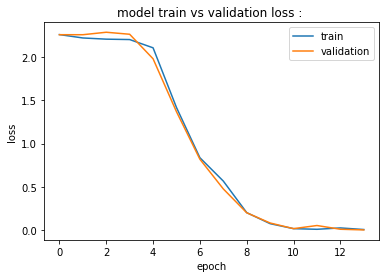

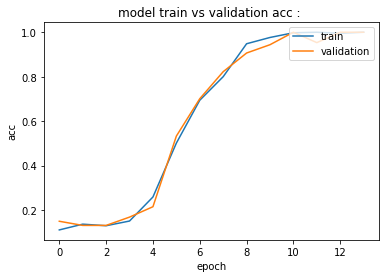

In [66]:
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.1,patience=5,verbose=0,mode='auto')
history=model.fit(x_train, y_train,
          batch_size=20,
          epochs=15,
          callbacks=[es],
          validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
model.evaluate(x_test,y_test)

In [68]:
model.evaluate(x_test,y_test)

228/228 [==============================] - 1s 2ms/step


[0.0017281500479663934, 1.0]

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 2s 5ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


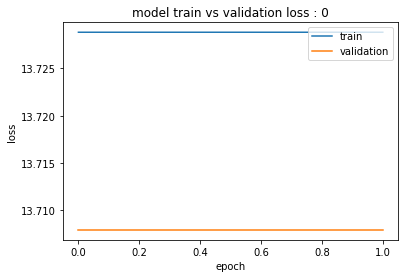

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


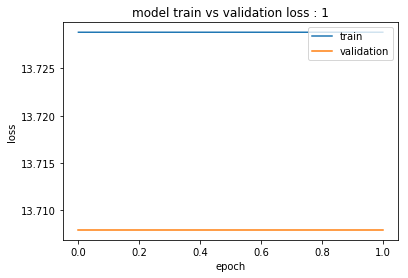

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


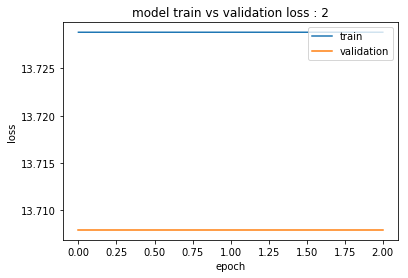

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 4/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


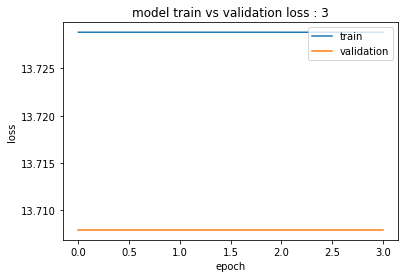

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 4/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 5/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


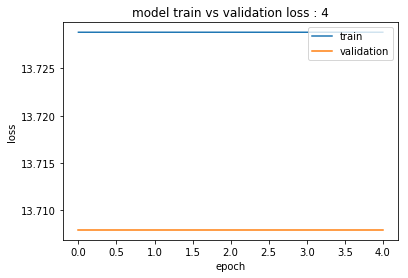

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 4/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 5/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 6/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495


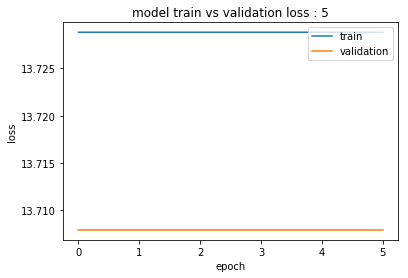

Train on 425 samples, validate on 107 samples
Epoch 1/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 4/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 5/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 6/40
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 7/40
200/425 [=============>................] - ETA: 0s - loss: 13.7004 - acc: 0.1500

KeyboardInterrupt: 

In [14]:
es=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=0,mode='auto')

In [15]:
history=model.fit(x_train, y_train,
          batch_size=20,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])

Train on 425 samples, validate on 107 samples
Epoch 1/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 6/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 13.7288 - acc: 0.1482 - val_loss: 13.7079 - val_acc: 0.1495
Epoch 8/1

In [56]:
model.save('my_model.h5')

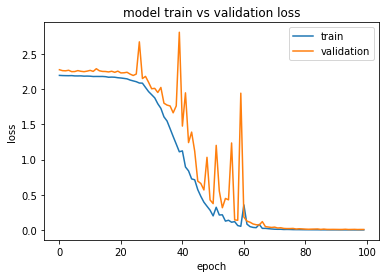

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )